# Régrassion Linéaire multiple

Nous importons les librairies :

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

1. DATASET

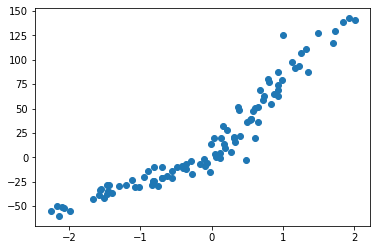

In [4]:
x, y = make_regression(n_samples = 100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x,y)

In [5]:
print(x.shape)
y = y.reshape(y.shape[0],1) #redimessionner
print(y.shape)

(100, 1)
(100, 1)


In [24]:
#matrice X
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 0.09596774  0.3097866   1.        ]
 [ 0.65316878  0.80818858  1.        ]
 [ 0.23723214  0.48706483  1.        ]
 [ 0.53446419  0.73107058  1.        ]
 [ 0.63078152  0.79421755  1.        ]
 [ 0.16407999 -0.40506788  1.        ]
 [ 0.46773032  0.68390812  1.        ]
 [ 0.15049691  0.38793932  1.        ]
 [ 0.68029185 -0.82479807  1.        ]
 [ 0.2331131  -0.48281787  1.        ]]


In [35]:
theta = np.random.randn(3,1)
theta

array([[ 0.36954498],
       [-0.24742158],
       [-0.4443207 ]])

2. MODELE

In [37]:
def model(X,theta):
    return X.dot(theta) #produit matriciel

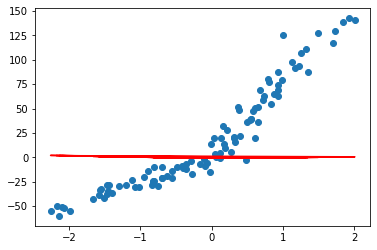

In [38]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')

3. FONCTION COUT

In [55]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/m * np.sum((model(X,theta)-y)**2)

In [56]:
cost_function(X,y,theta)

3088.4147917211353

4. GRADIENT DESCENT

In [57]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [58]:
def gradient_descent(X,y,theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] =  cost_function(X,y,theta)
    return theta, cost_history

5. ENTRAÎNEMENT 

In [59]:
theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iteration=1000)

In [60]:
theta_final

array([[11.41899605],
       [51.38825897],
       [10.17787746]])

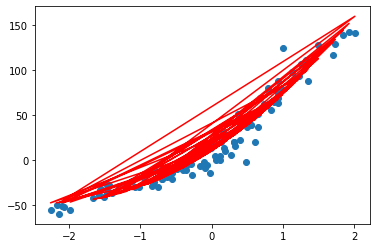

In [61]:
predictions = model(X,theta_final)
plt.scatter(x[:,0],y)
plt.plot(x[:,0],predictions, c='r')

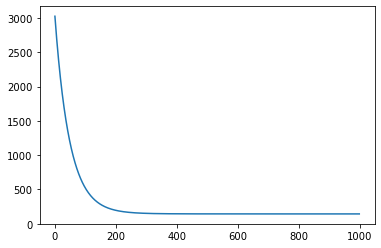

In [62]:
plt.plot(range(1000), cost_history)

6. COEF DE DETERMINATION

In [63]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [64]:
coef_determination(y, predictions)

0.9475165097941407